# Step 1

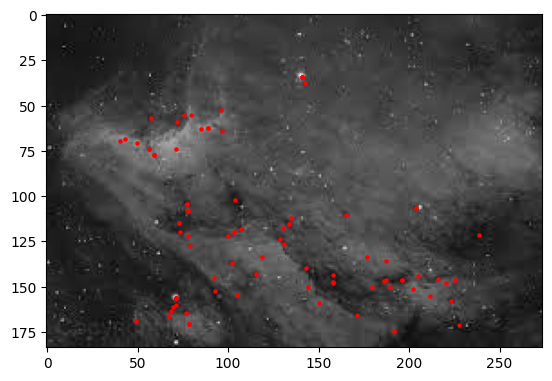

In [2]:
import cv2
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import Counter

image = cv2.imread('astro.jpg', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(image, None)

# Display the image with keypoints using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.scatter([kp.pt[0] for kp in keypoints], [kp.pt[1] for kp in keypoints], c='red', s=5)
plt.show()



# Step 2

In [3]:

# Standardize the descriptors
scaler = StandardScaler()
descriptors = scaler.fit_transform(descriptors)
# Define the number of clusters (K)
k = 5  # You can adjust this to your desired number of clusters

# Initialize the K-means model
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model to the data
kmeans.fit(descriptors)

# Get cluster assignments for each descriptor
cluster_labels = kmeans.labels_


# Count the number of descriptors in each cluster
cluster_counts = Counter(cluster_labels)

# Print cluster counts
for cluster_num, count in cluster_counts.items():
    print(f'Cluster {cluster_num}: {count} descriptors')
    
cluster_centers = kmeans.cluster_centers_




C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0: 19 descriptors
Cluster 3: 17 descriptors
Cluster 2: 14 descriptors
Cluster 4: 29 descriptors
Cluster 1: 11 descriptors


# Step 3

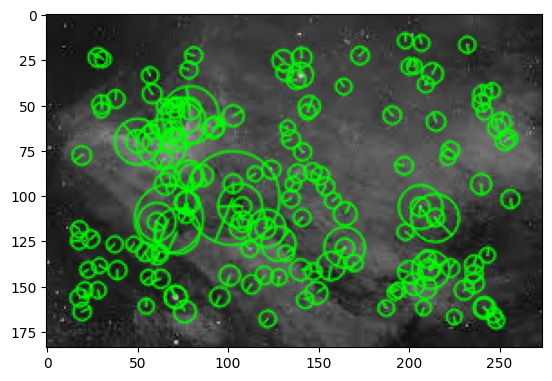

In [13]:
brisk = cv2.BRISK_create()
keypoints = brisk.detect(image, None)

# Draw keypoints using Matplotlib
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(image_with_keypoints)
plt.show()



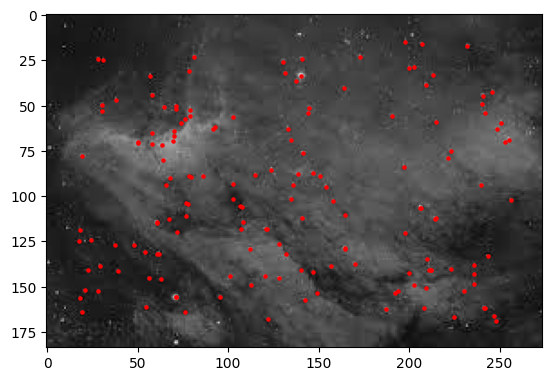

In [4]:
brisk = cv2.BRISK_create()
keypoints = brisk.detect(image, None)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.scatter([kp.pt[0] for kp in keypoints], [kp.pt[1] for kp in keypoints], c='red', s=5)
plt.show()

# Step 4

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


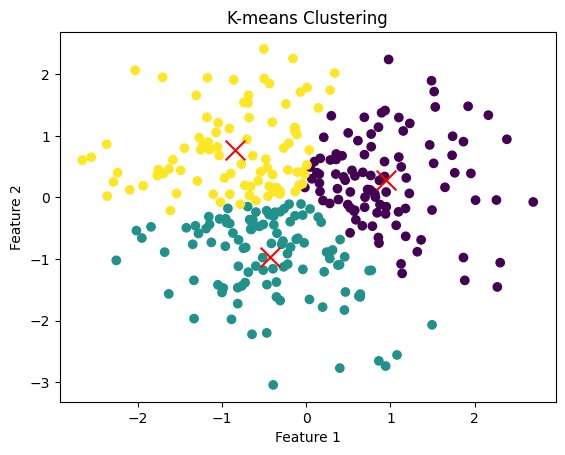

In [16]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate some sample data (replace this with your data)
np.random.seed(0)
data = np.random.randn(300, 2)  # 300 data points with 2 features

# Define the number of clusters (K)
k = 3

# Create a K-means model
kmeans = KMeans(n_clusters=k)

# Fit the model to your data
kmeans.fit(data)

# Get the cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



# Step 5

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: Co

ValueError: 'c' argument has 600 elements, which is inconsistent with 'x' and 'y' with size 300.

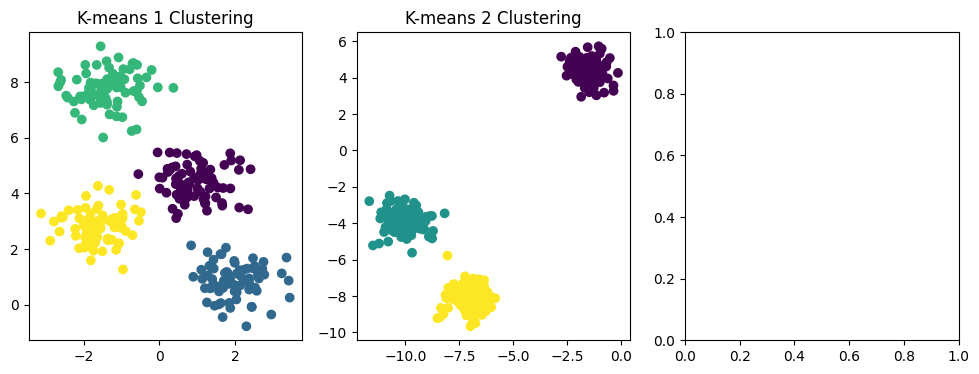

In [17]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate two sets of sample data
data1, _ = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)
data2, _ = make_blobs(n_samples=300, centers=3, random_state=1, cluster_std=0.60)

# Perform K-means clustering for both datasets
kmeans1 = KMeans(n_clusters=4, random_state=0)
kmeans2 = KMeans(n_clusters=3, random_state=1)

cluster_labels1 = kmeans1.fit_predict(data1)
cluster_labels2 = kmeans2.fit_predict(data2)

# Combine cluster assignments from both K-means runs
combined_cluster_labels = np.concatenate((cluster_labels1, cluster_labels2))

# Perform K-means clustering on the combined cluster assignments
final_kmeans = KMeans(n_clusters=5, random_state=0)
final_cluster_labels = final_kmeans.fit_predict(combined_cluster_labels.reshape(-1, 1))

# Visualize the combined clustering results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(data1[:, 0], data1[:, 1], c=cluster_labels1, cmap='viridis')
plt.title('K-means 1 Clustering')

plt.subplot(132)
plt.scatter(data2[:, 0], data2[:, 1], c=cluster_labels2, cmap='viridis')
plt.title('K-means 2 Clustering')

plt.subplot(133)
plt.scatter(data1[:, 0], data1[:, 1], c=final_cluster_labels, cmap='viridis')
plt.title('Combined K-means Clustering')

plt.tight_layout()
plt.show()


# Step 6


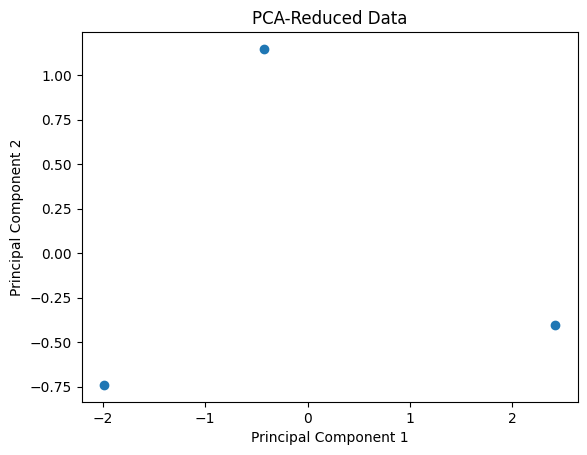

In [20]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming you have your feature vector table, replace this with your actual data
# Create a sample data matrix with missing values (NaN)
data = np.array([[1.0, 2.0, np.nan, 4.0],
                 [5.0, 6.0, 7.0, 8.0],
                 [9.0, 10.0, 11.0, 12.0]])

# Check for NaN values in the data
nan_mask = np.isnan(data)

# Impute missing values with the mean of each feature
imputer = SimpleImputer(strategy='mean')
data = imputer.fit_transform(data)

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Define the number of components for PCA
num_components = 2  # Adjust as needed

# Apply PCA
pca = PCA(n_components=num_components)
reduced_features = pca.fit_transform(data)

# Visualize the reduced data (optional)
import matplotlib.pyplot as plt

plt.scatter(reduced_features[:, 0], reduced_features[:, 1])
plt.title('PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
